# Macro Trends: National Agricultural Production & Indices

This notebook analyzes **all‑India agricultural production** (in million tonnes) and **production indices** (2004‑05 = 100) for major crop groups using:

- `produce.csv` – national production series for foodgrains and components (Ton mn).
- `datafile.csv` – index of agricultural production by crop group and All Agriculture.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 4)

prod = pd.read_csv("produce.csv")
idx  = pd.read_csv("datafile.csv")

prod.head(), idx.head()


(                                      Particulars  \
 0              Agricultural Production Foodgrains   
 1       Agricultural Production Foodgrains Kharif   
 2         Agricultural Production Foodgrains Rabi   
 3         Agricultural Production Foodgrains Rice   
 4  Agricultural Production Foodgrains Rice Kharif   
 
                          Frequency    Unit   3-1993   3-1994   3-1995  \
 0  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
 1  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
 2  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
 3  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
 4  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
 
     3-1996   3-1997   3-1998   3-1999  ...     3-2005    3-2006     3-2007  \
 0      NaN      NaN      NaN      NaN  ...  198.36282  208.6016  217.28212   
 1      NaN      NaN      NaN      NaN  ...  103.30942  109.8734  110.

## National production data (`produce.csv`)

`produce.csv` contains national production time series such as:
- Agricultural Production Foodgrains
- Rice, Wheat, Coarse Cereals, etc.
with units in **Ton mn**, and years encoded in columns like `3-2005`, `3-2006`, etc.


In [5]:
# identify id and year columns
id_cols = ["Particulars", "Frequency", "Unit"]
year_cols = [c for c in prod.columns if c not in id_cols]

prod_long = prod.melt(
    id_vars=id_cols,
    value_vars=year_cols,
    var_name="year_raw",
    value_name="value"
)

# extract year from labels like ' 3-2010'
prod_long["year"] = prod_long["year_raw"].str.extract(r"(\d{4})")
prod_long["year"] = prod_long["year"].astype("Int64")

# drop rows without a proper year
prod_long = prod_long.dropna(subset=["year"]).reset_index(drop=True)

prod_long.head()


,Particulars,Frequency,Unit,year_raw,value,year
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,3-1993,NaN,1993
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,3-1993,NaN,1993
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,3-1993,NaN,1993
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,3-1993,NaN,1993
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,3-1993,NaN,1993


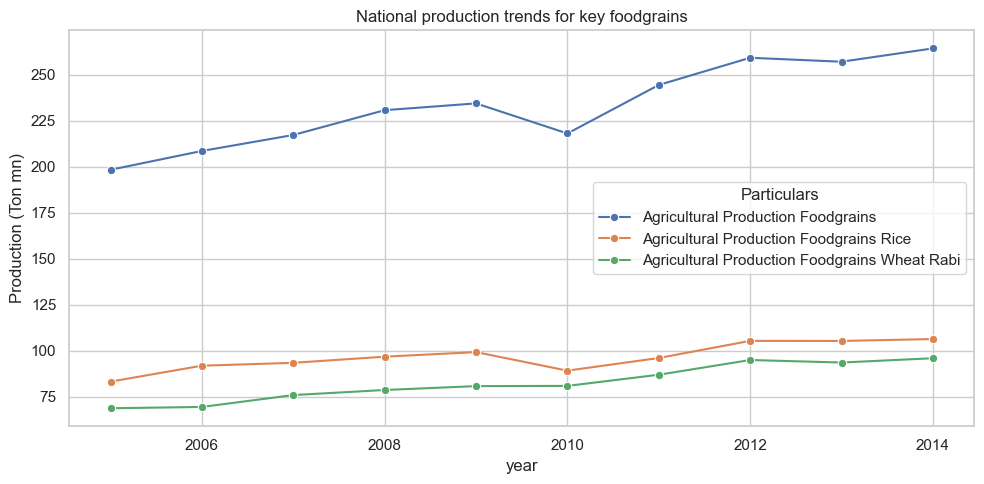

In [6]:
focus_series = [
    "Agricultural Production Foodgrains",
    "Agricultural Production Foodgrains Rice",
    "Agricultural Production Foodgrains Wheat Rabi",
]

mask = prod_long["Particulars"].isin(focus_series)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=prod_long[mask],
    x="year",
    y="value",
    hue="Particulars",
    marker="o"
)
plt.ylabel("Production (Ton mn)")
plt.title("National production trends for key foodgrains")
plt.tight_layout()
plt.show()


## Production index data (`datafile.csv`)

`datafile.csv` provides **index values (2004‑05 = 100)** for crop groups such as Rice, Wheat, Pulses, Coarse Cereals, Oilseeds, Fibres, and All Agriculture across 2004‑05 to 2011‑12.


In [7]:
idx.head()
idx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB


In [8]:
idx["Crop"] = idx["Crop"].astype(str).str.strip()

# remove empty trailing row if present
idx = idx.dropna(subset=["Crop"]).reset_index(drop=True)

idx_long = idx.melt(
    id_vars=["Crop"],
    var_name="year",
    value_name="index_val"
)

idx_long["year"] = idx_long["year"].astype(str)

idx_long.head()


,Crop,year,index_val
0,Rice,2004-05,100.0
1,Wheat,2004-05,100.0
2,Coarse Cereals,2004-05,100.0
3,Pulses,2004-05,100.0
4,Vegetables,2004-05,100.0


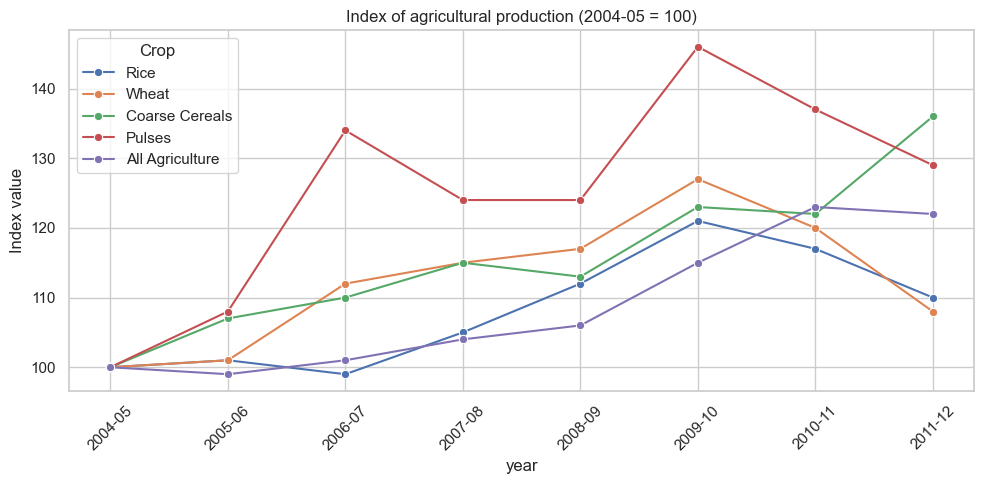

In [9]:
focus_crops = ["Rice", "Wheat", "Coarse Cereals", "Pulses", "All Agriculture"]

mask_idx = idx_long["Crop"].isin(focus_crops)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=idx_long[mask_idx],
    x="year",
    y="index_val",
    hue="Crop",
    marker="o"
)
plt.title("Index of agricultural production (2004-05 = 100)")
plt.ylabel("Index value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Summary statistics for indices

To briefly quantify growth, compute min and max index per crop group over the period.


In [10]:
summary_idx = (
    idx_long[idx_long["Crop"].isin(focus_crops)]
    .groupby("Crop")["index_val"]
    .agg(["min", "max"])
    .reset_index()
    .sort_values("max", ascending=False)
)
summary_idx


,Crop,min,max
2,Pulses,100.0,146.0
1,Coarse Cereals,100.0,136.0
4,Wheat,100.0,127.0
0,All Agriculture,99.0,123.0
3,Rice,99.0,121.0
